In [1]:
%load_ext autoreload
%autoreload 2
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt


In [44]:
from domino.data.imagenet import get_imagenet_dp
from domino.utils import split_dp
from domino.emb import embed_images
import numpy as np
import torch

In [2]:
data_dp = get_imagenet_dp.out().load()
runs = embed_images.get_runs()
runs[runs["hostname"] == "pod-sabri"]

In [39]:
data_dp = get_imagenet_dp()

split = split_dp(dp=data_dp, split_on="image_id")
data_dp = data_dp.load()

cache hit –> task: get_imagenet_dp, run_id=19189
cache hit –> task: split_dp, run_id=19190


In [55]:
dp = embed_images(
    emb_type="imagenet",
    dp=data_dp,
    split_dp=split,
    splits=["valid"],
    model="resnet18",
    img_column="image",
    mmap=True,
    num_workers=7,
    layers={"emb": "layer4"},
).load()


task: embed_images, run_id=46665
task: embed_images, run_id=46666


In [51]:
dp = embed_images.out(46403).load()

In [56]:
from torchvision import models, transforms
import torch

model = models.resnet18(pretrained=True)
dp["y_hat"] = model.fc(torch.tensor(dp["emb"].data).to(torch.float))

In [57]:
probs = dp["y_hat"].data
probs = torch.nn.functional.softmax(probs, dim=0)

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

dp["preds"] = list(map(lambda x: categories[x], probs.argmax(dim=1)))

,image_id (PandasSeriesColumn),path (PandasSeriesColumn),index (PandasSeriesColumn),image (ListColumn),name (PandasSeriesColumn),synset_pos_offset (PandasSeriesColumn),synset (PandasSeriesColumn),split (PandasSeriesColumn),emb (NumpyArrayColumn),y_hat (TensorColumn),preds (PandasSeriesColumn)
0,n01491361_799,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_799.JPEG,500,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),syringe
1,n01491361_8188,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_8188.JPEG,501,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),Sealyham terrier
2,n01491361_818,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_818.JPEG,502,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),screwdriver
3,n01491361_8450,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_8450.JPEG,503,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),syringe
4,n01491361_8621,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_8621.JPEG,504,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),umbrella
5,n01491361_8657,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_8657.JPEG,505,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),cowboy hat
6,n01491361_875,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_875.JPEG,506,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),Band Aid
7,n01491361_8772,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_8772.JPEG,507,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),prayer rug
8,n01491361_8825,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_8825.JPEG,508,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),neck brace
9,n01491361_8839,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_8839.JPEG,509,,"tiger shark, Galeocerdo cuvieri",n01491361,tiger_shark.n.01,valid,"np.ndarray(shape=(512,))",torch.Tensor(shape=torch.Size([1000])),ashcan

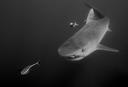
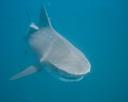
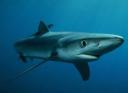
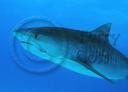
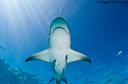
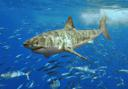
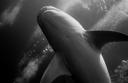
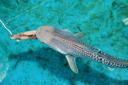
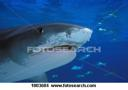
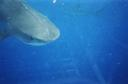

In [60]:
dp[500:510]

In [63]:
dp["preds"].data.value_counts()[:10]

stretcher       4083
cowboy hat      3253
ashcan          2757
king penguin    2581
book jacket     2572
lakeside        2497
buckle          2445
prayer rug      2392
bannister       2160
sandbar         1965
dtype: int64

In [64]:
len(dp)

132825

In [ ]:
psutil.numcpus()

AttributeError: module 'psutil' has no attribute 'numcpus'

In [ ]:
import ray
ray.get_gpu_ids()

2021-09-27 22:07:35,466	INFO services.py:1250 -- View the Ray dashboard at http://127.0.0.1:8265
2021-09-27 22:07:35,881	WARNING worker.py:499 -- `ray.get_gpu_ids()` will always return the empty list when called from the driver. This is because Ray does not manage GPU allocations to the driver process.


[]

In [ ]:
import torch
use_cuda = torch.cuda.is_available()


In [ ]:
use_cuda

True

In [ ]:
torch.cuda.device_count()

1

In [ ]:
import psutil
psutil.cpu_count()

8